In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
#pop = pd.read_csv('SYB63_1_202105_Population, Surface Area and Density.csv')
gdp = pd.read_csv('SYB63_230_202009_GDP and GDP Per Capita.csv')
co2 = pd.read_csv('SYB63_310_202009_Carbon Dioxide Emission Estimates.csv')
GDP = []
CO2 = []

In [3]:
def split_df(df,df_name):
    key = Counter(df['Unnamed: 3']).keys()
    key = list(key)
    key = key[1:]
    print('변수 생성 개수',len(key))
    print(key)
    for i,v in enumerate(key):
        globals()['%s%d'%(df_name,i)] = df[df['Unnamed: 3']== v]
    
    return key
        
        
gdp_ = 'gdp_'
co2_ = 'co2_'
gdp_key = split_df(gdp,gdp_)
co2_key = split_df(co2,co2_)
    

변수 생성 개수 4
['GDP in current prices (millions of US dollars)', 'GDP per capita (US dollars)', 'GDP in constant 2010 prices (millions of US dollars)', 'GDP real rates of growth (percent)']
변수 생성 개수 2
['Emissions (thousand metric tons of carbon dioxide)', 'Emissions per capita (metric tons of carbon dioxide)']


In [4]:
len(gdp_0),len(gdp_1),len(gdp_2),len(gdp_3),len(co2_0),len(co2_1)

(1662, 1662, 1662, 1658, 1066, 1066)

In [5]:
def graph(a,b,c,d,ss):
    print('%s'%ss)
    s = a.columns[2]
    print(a.columns[2],a['Unnamed: 4'].iloc[0])
    x1 = a['%s'%s]
    y1 = a['Unnamed: 4'].astype(float)
    x2 = b['%s'%s]
    y2 = b['Unnamed: 4'].astype(float)
    x3 = c['%s'%s]
    y3 = c['Unnamed: 4'].astype(float)
    x4 = d['%s'%s]
    y4 = d['Unnamed: 4'].astype(float)
  
    plt.figure(figsize=(50,30))
    plt.subplots_adjust(hspace=1)
    plt.suptitle('%s'%ss,fontsize=40)
    ##
    plt.subplot(5,1,1)
    line1 = plt.plot(x1,y1)
    plt.setp(line1, color='r', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%a['Unnamed: 2'].iloc[0],fontsize=25)
    ##
    plt.subplot(5,1,2)
    line2 = plt.plot(x2,y2)
    plt.setp(line2, color='g', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%b['Unnamed: 2'].iloc[0],fontsize=25)
    ##
    plt.subplot(5,1,3)
    line3 = plt.plot(x3,y3)
    plt.setp(line3, color='b', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%c['Unnamed: 2'].iloc[0],fontsize=25)
    ##
    plt.subplot(5,1,4)
    line4 = plt.plot(x4,y4)
    plt.setp(line4, color='y', linewidth=3.0)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('%s'%d['Unnamed: 2'].iloc[0],fontsize=25)
    ##
    plt.subplot(5,1,5)
    plt.plot(x1,y1,'r')
    plt.plot(x2,y2,'g')
    plt.plot(x3,y3,'b')
    plt.plot(x4,y4,'y')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Total',fontsize=25)
    plt.show()

### 05,10,15,17 년도 별로 데이터 분류

In [6]:
def data(dataframe):
    dataframe.drop(['Unnamed: 5','Unnamed: 6'], axis=1)
    a = dataframe.loc[dataframe['Unnamed: 2']=='2005']
    b = dataframe.loc[dataframe['Unnamed: 2']=='2010']
    c = dataframe.loc[dataframe['Unnamed: 2']=='2015']
    d = dataframe.loc[dataframe['Unnamed: 2']=='2017']
    return a,b,c,d,pd.concat([a,b,c,d])

### 각 데이터프레임마다 나라의 개수가 달라서, 나라 개수 맞추는 함수 country()

In [7]:
def country(df1,df2): 
    country = []
    for i  in df1['%s'%df1.columns[1]]:
        for j in df2['%s'%df2.columns[1]]:
            if i==j:
                country.append(i)
    #country = {'country':country}
    #country = pd.DataFrame(country)
    return country  

In [8]:
a0,b0,c0,d0,gdp_0 = data(gdp_0)
a1,b1,c1,d1,gdp_1 = data(gdp_1)
a2,b2,c2,d2,gdp_2 = data(gdp_2)
a3,b3,c3,d3,gdp_3 = data(gdp_3)
a00,b00,c00,d00,co2_0 = data(co2_0)
a11,b11,c11,d11,co2_1 = data(co2_1)

In [9]:
GDP = [a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
CO2 = [a00,b00,c00,d00,a11,b11,c11,d11]

In [10]:
'''FOR 문을 통해서 각 데이터별 비교하여 동일한 나라 개수 확인'''
country_len = []
countries = []
idx = []
for i,v in enumerate(GDP):
    for j,k in enumerate(CO2):
        countries_ = country(v,k) #변수에 비교값 나라명 데이터 저장
        countries.append(country(v,k)) #배열에 나라명 데이터 저장 
        country_len.append(len(countries_)) #각 길이데이터를 저장
#country_len

In [11]:
'''제일 작은 동일나라 개수를 갖는 조합 그리고, 둘 이상이라면 개수에 추가하여 내용이 같은지 판단'''
min_idx = []
for i in range(len(countries)):
    if min(country_len) == country_len[i]:
        min_idx.append(i)
print('최소 동일 개수',min(country_len))
print('최소 동일 개수를 같는 조합 인덱스 ',min_idx)

최소 동일 개수 138
최소 동일 개수를 같는 조합 인덱스  [0, 1, 4, 5, 32, 33, 36, 37, 64, 65, 68, 69, 96, 97, 98, 99, 100, 101, 102, 103]


In [12]:
for i in range(len(min_idx)-1):
    if countries[min_idx[i]]==countries[min_idx[i+1]]:
        print(min_idx[i],min_idx[i+1],end=" , ")
#138의 최소길이를 뽑은 배열들의 나라 이름의 동일함 판단 모두 동일

0 1 , 1 4 , 4 5 , 5 32 , 32 33 , 33 36 , 36 37 , 37 64 , 64 65 , 65 68 , 68 69 , 69 96 , 96 97 , 97 98 , 98 99 , 99 100 , 100 101 , 101 102 , 102 103 , 

#### 처음 조합부터 끝까지 모두 동일함을 확인

In [13]:
print('해당 나라를 기준으로 데이터 경량화 진행')
country = countries[0]
country = {'country':country}
country = pd.DataFrame(country)
country

해당 나라를 기준으로 데이터 경량화 진행


country
0                       Albania
1                       Algeria
2                        Angola
3                     Argentina
4                       Armenia
..                          ...
133  Venezuela (Boliv. Rep. of)
134                    Viet Nam
135                       Yemen
136                      Zambia
137                    Zimbabwe

[138 rows x 1 columns]

### 경량화 함수 size_()

In [14]:
def size_(sizing, df):  
    df_country = df.columns[1]
    size_col = sizing.columns[0]
    return pd.merge(sizing,df,left_on='%s'%size_col,right_on='%s'%df_country)

In [15]:
a0 = size_(country,a0)
b0 = size_(country,b0)
c0 = size_(country,c0)
d0 = size_(country,d0)
a1 = size_(country,a1)
b1 = size_(country,b1)
c1 = size_(country,c1)
d1 = size_(country,d1)
a2 = size_(country,a2)
b2 = size_(country,b2)
c2 = size_(country,c2)
d2 = size_(country,d2)
a3 = size_(country,a3)
b3 = size_(country,b3)
c3 = size_(country,c3)
d3 = size_(country,d3)

a00 = size_(country,a00)
b00 = size_(country,b00)
c00 = size_(country,c00)
d00 = size_(country,d00)
a11 = size_(country,a11)
b11 = size_(country,b11)
c11 = size_(country,c11)
d11 = size_(country,d11)

In [16]:
a0.columns

Index(['country', 'T12',
       'Gross domestic product and gross domestic product per capita',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

### gdp 그래프

GDP in current prices (millions of US dollars)
Gross domestic product and gross domestic product per capita 8052.0793


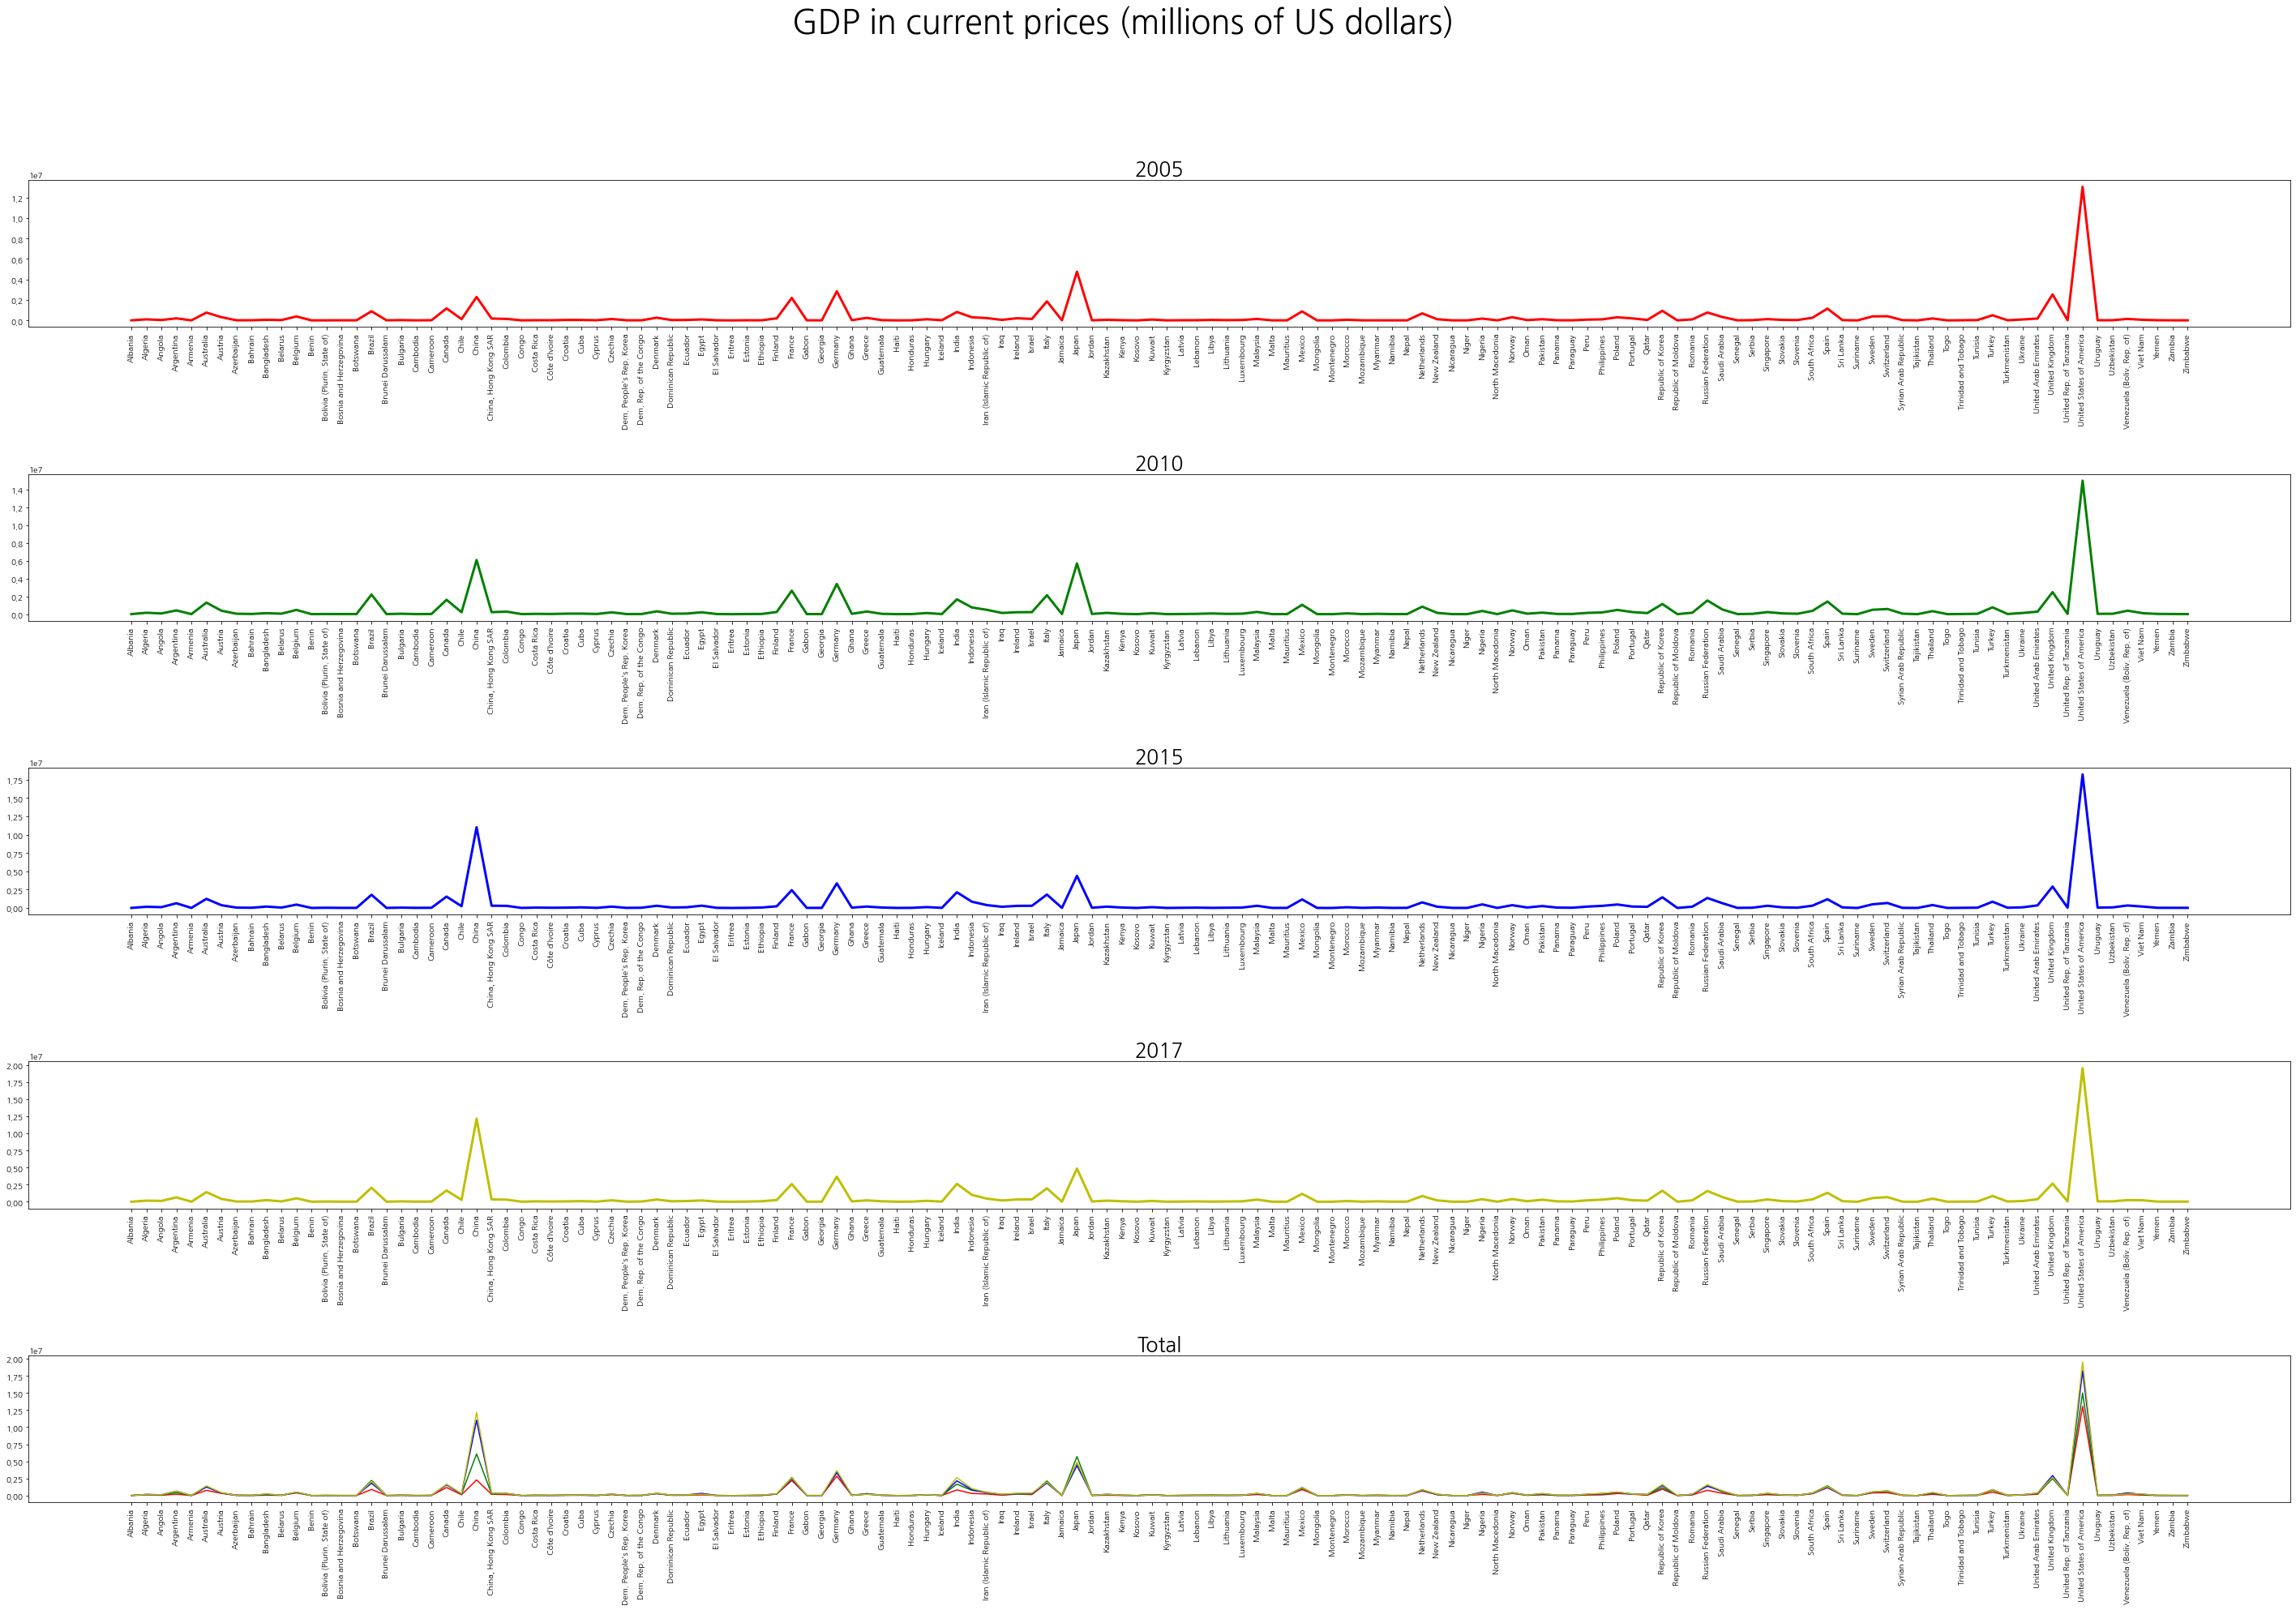

In [17]:
graph(a0,b0,c0,d0,gdp_key[0]) 

GDP per capita (US dollars)
Gross domestic product and gross domestic product per capita 2608.5439


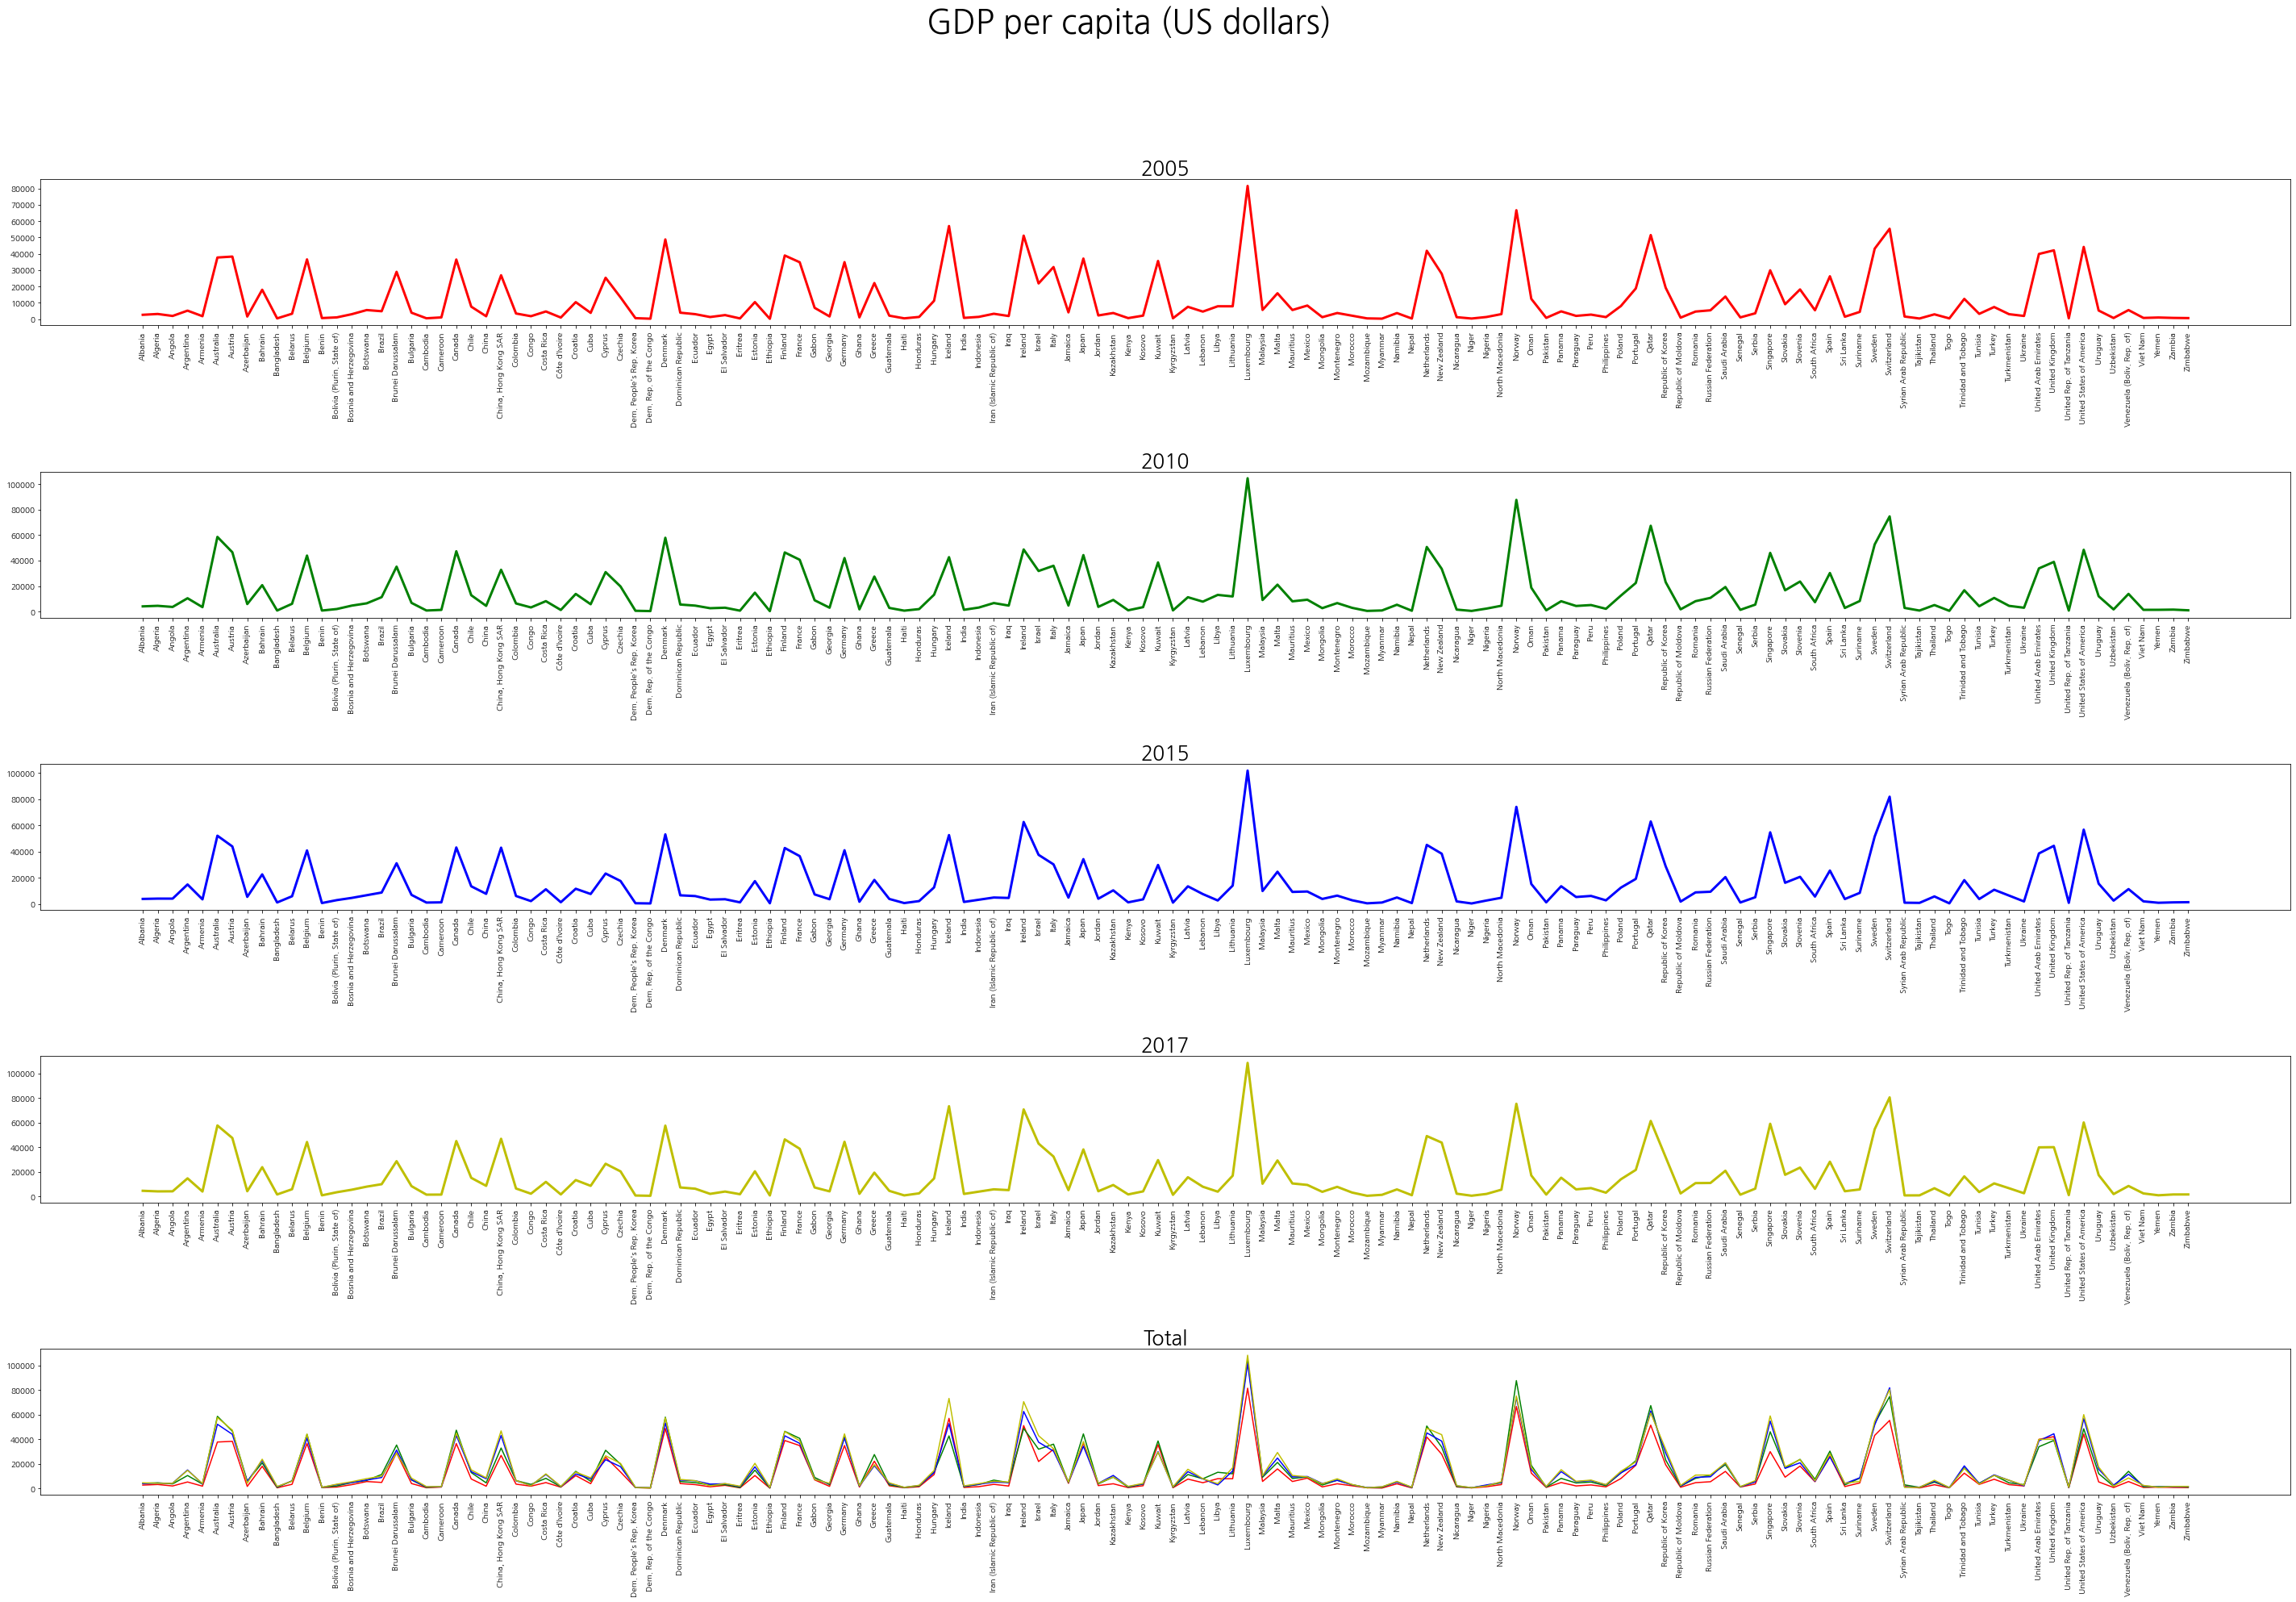

In [18]:
graph(a1,b1,c1,d1,gdp_key[1]) 

GDP in constant 2010 prices (millions of US dollars)
Gross domestic product and gross domestic product per capita 8057.3132


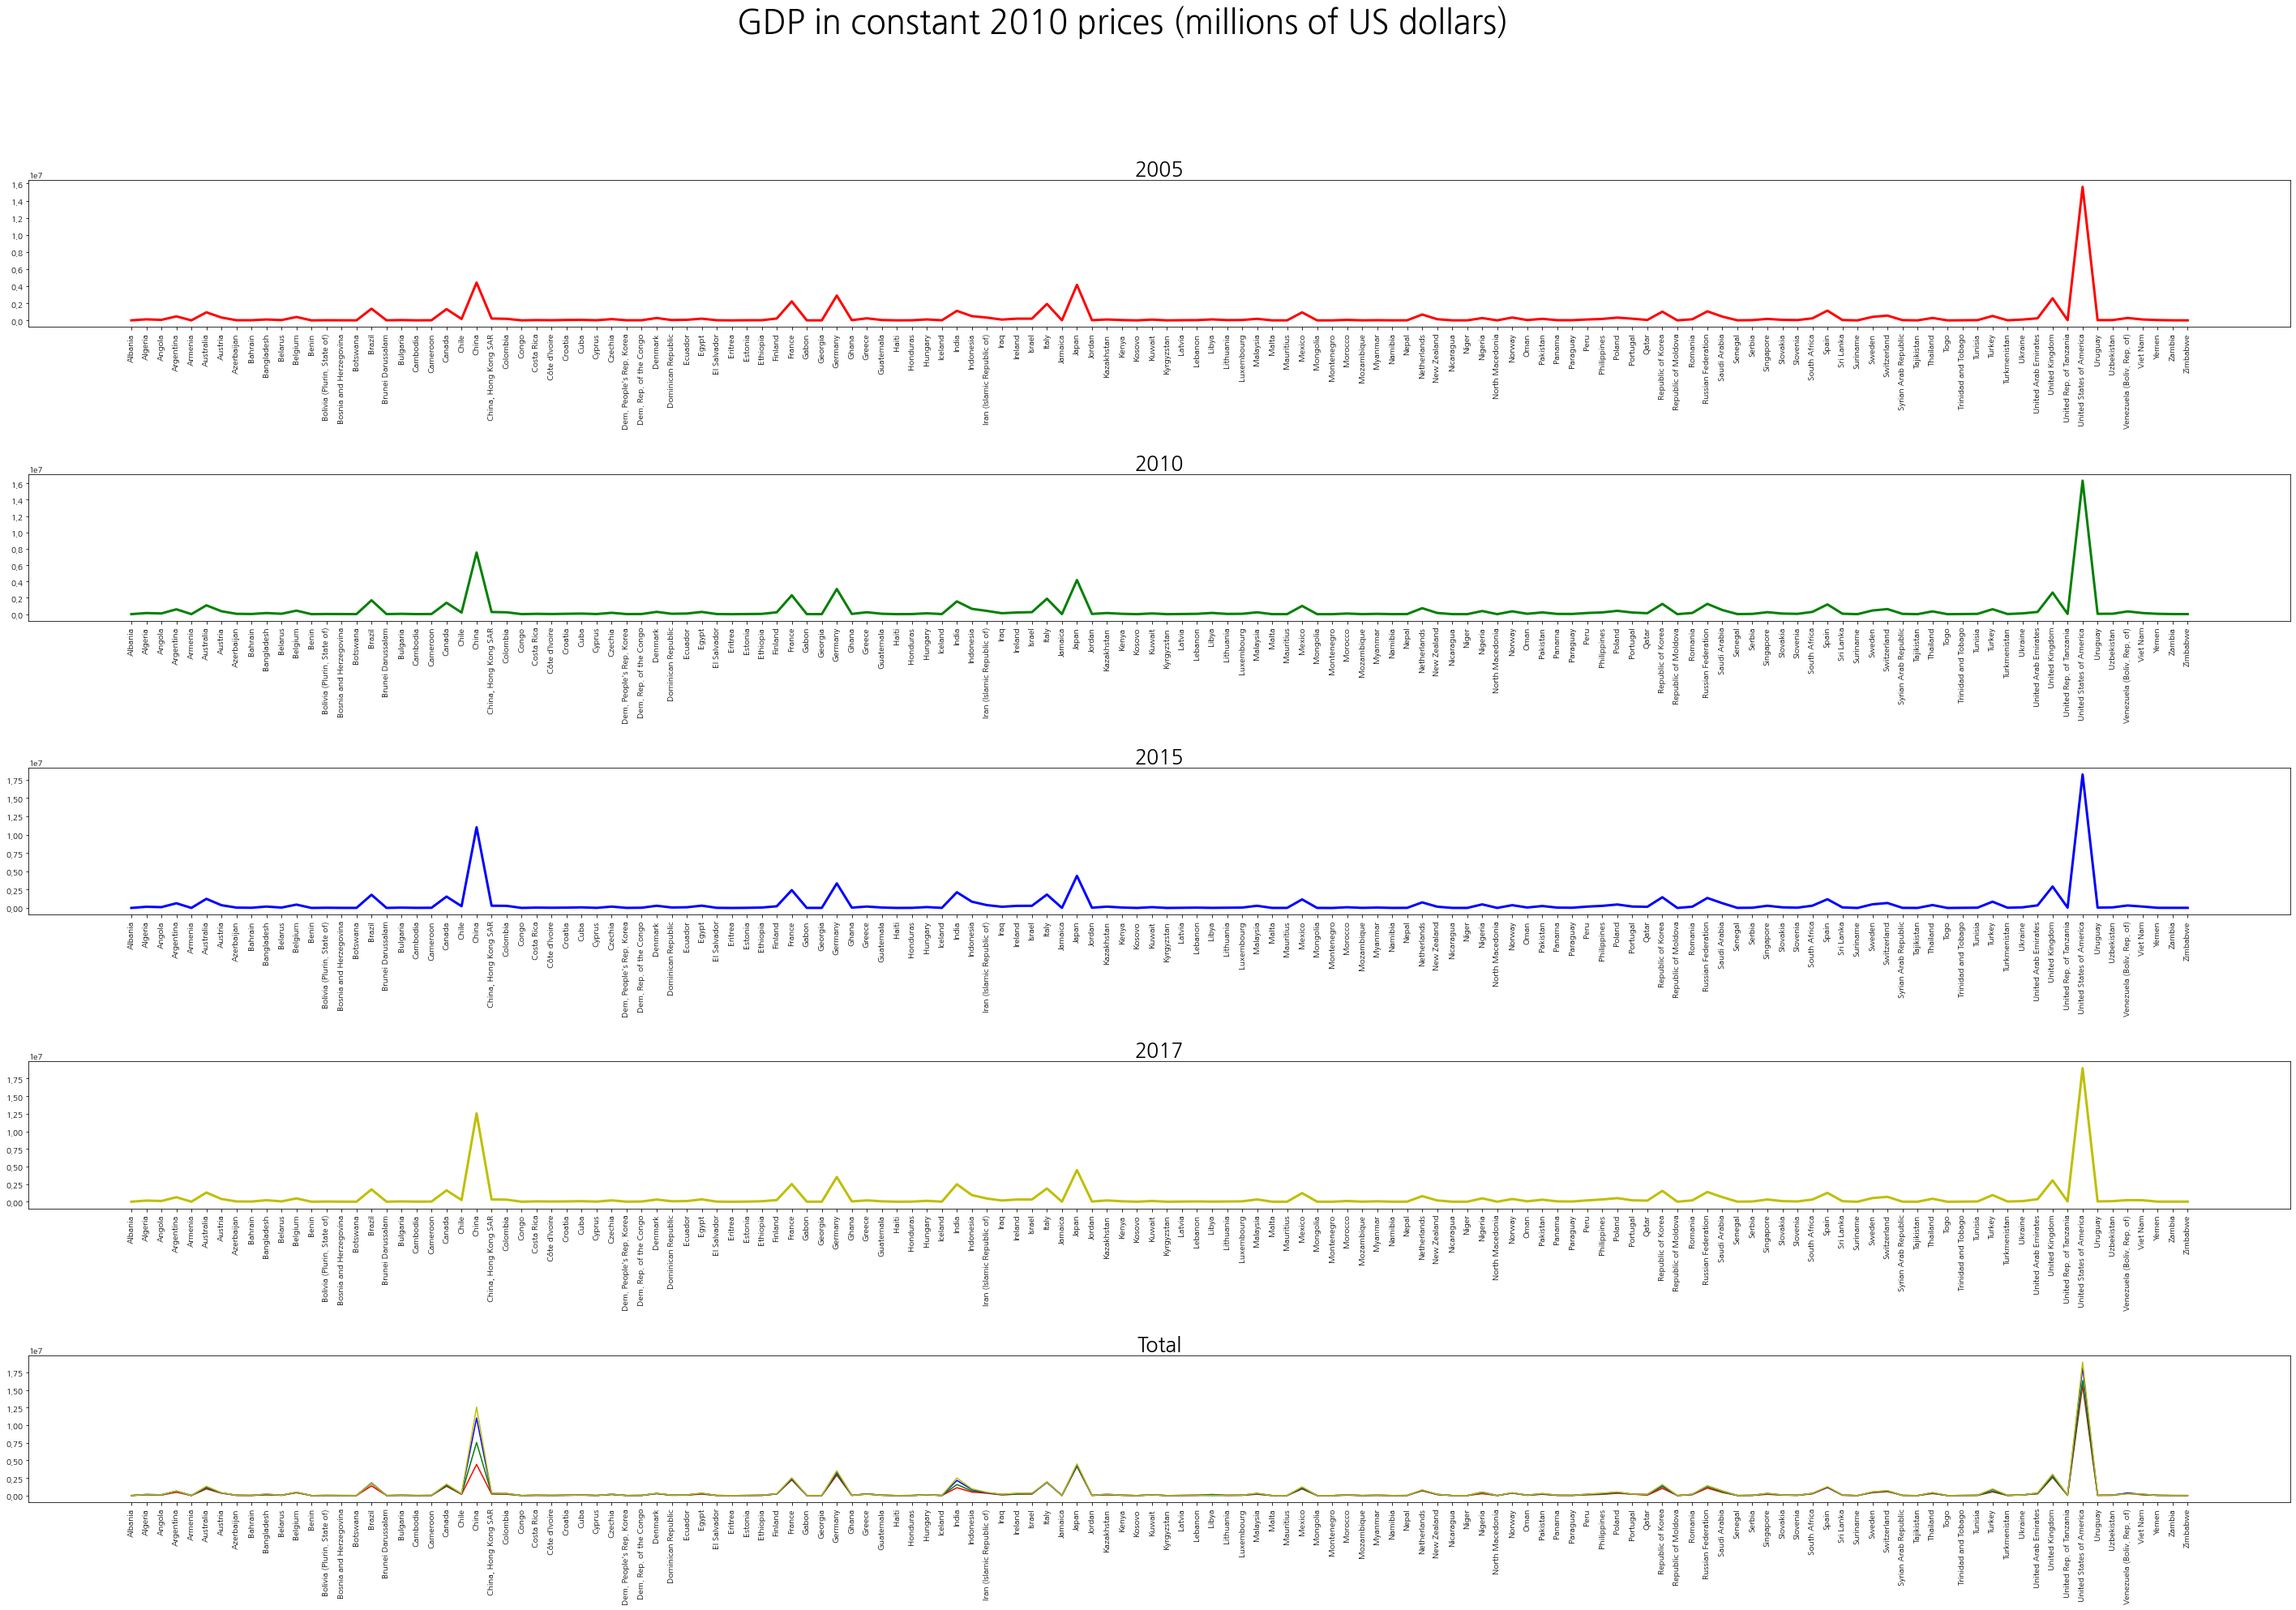

In [19]:
graph(a2,b2,c2,d2,gdp_key[2]) 

GDP real rates of growth (percent)
Gross domestic product and gross domestic product per capita 5.5265


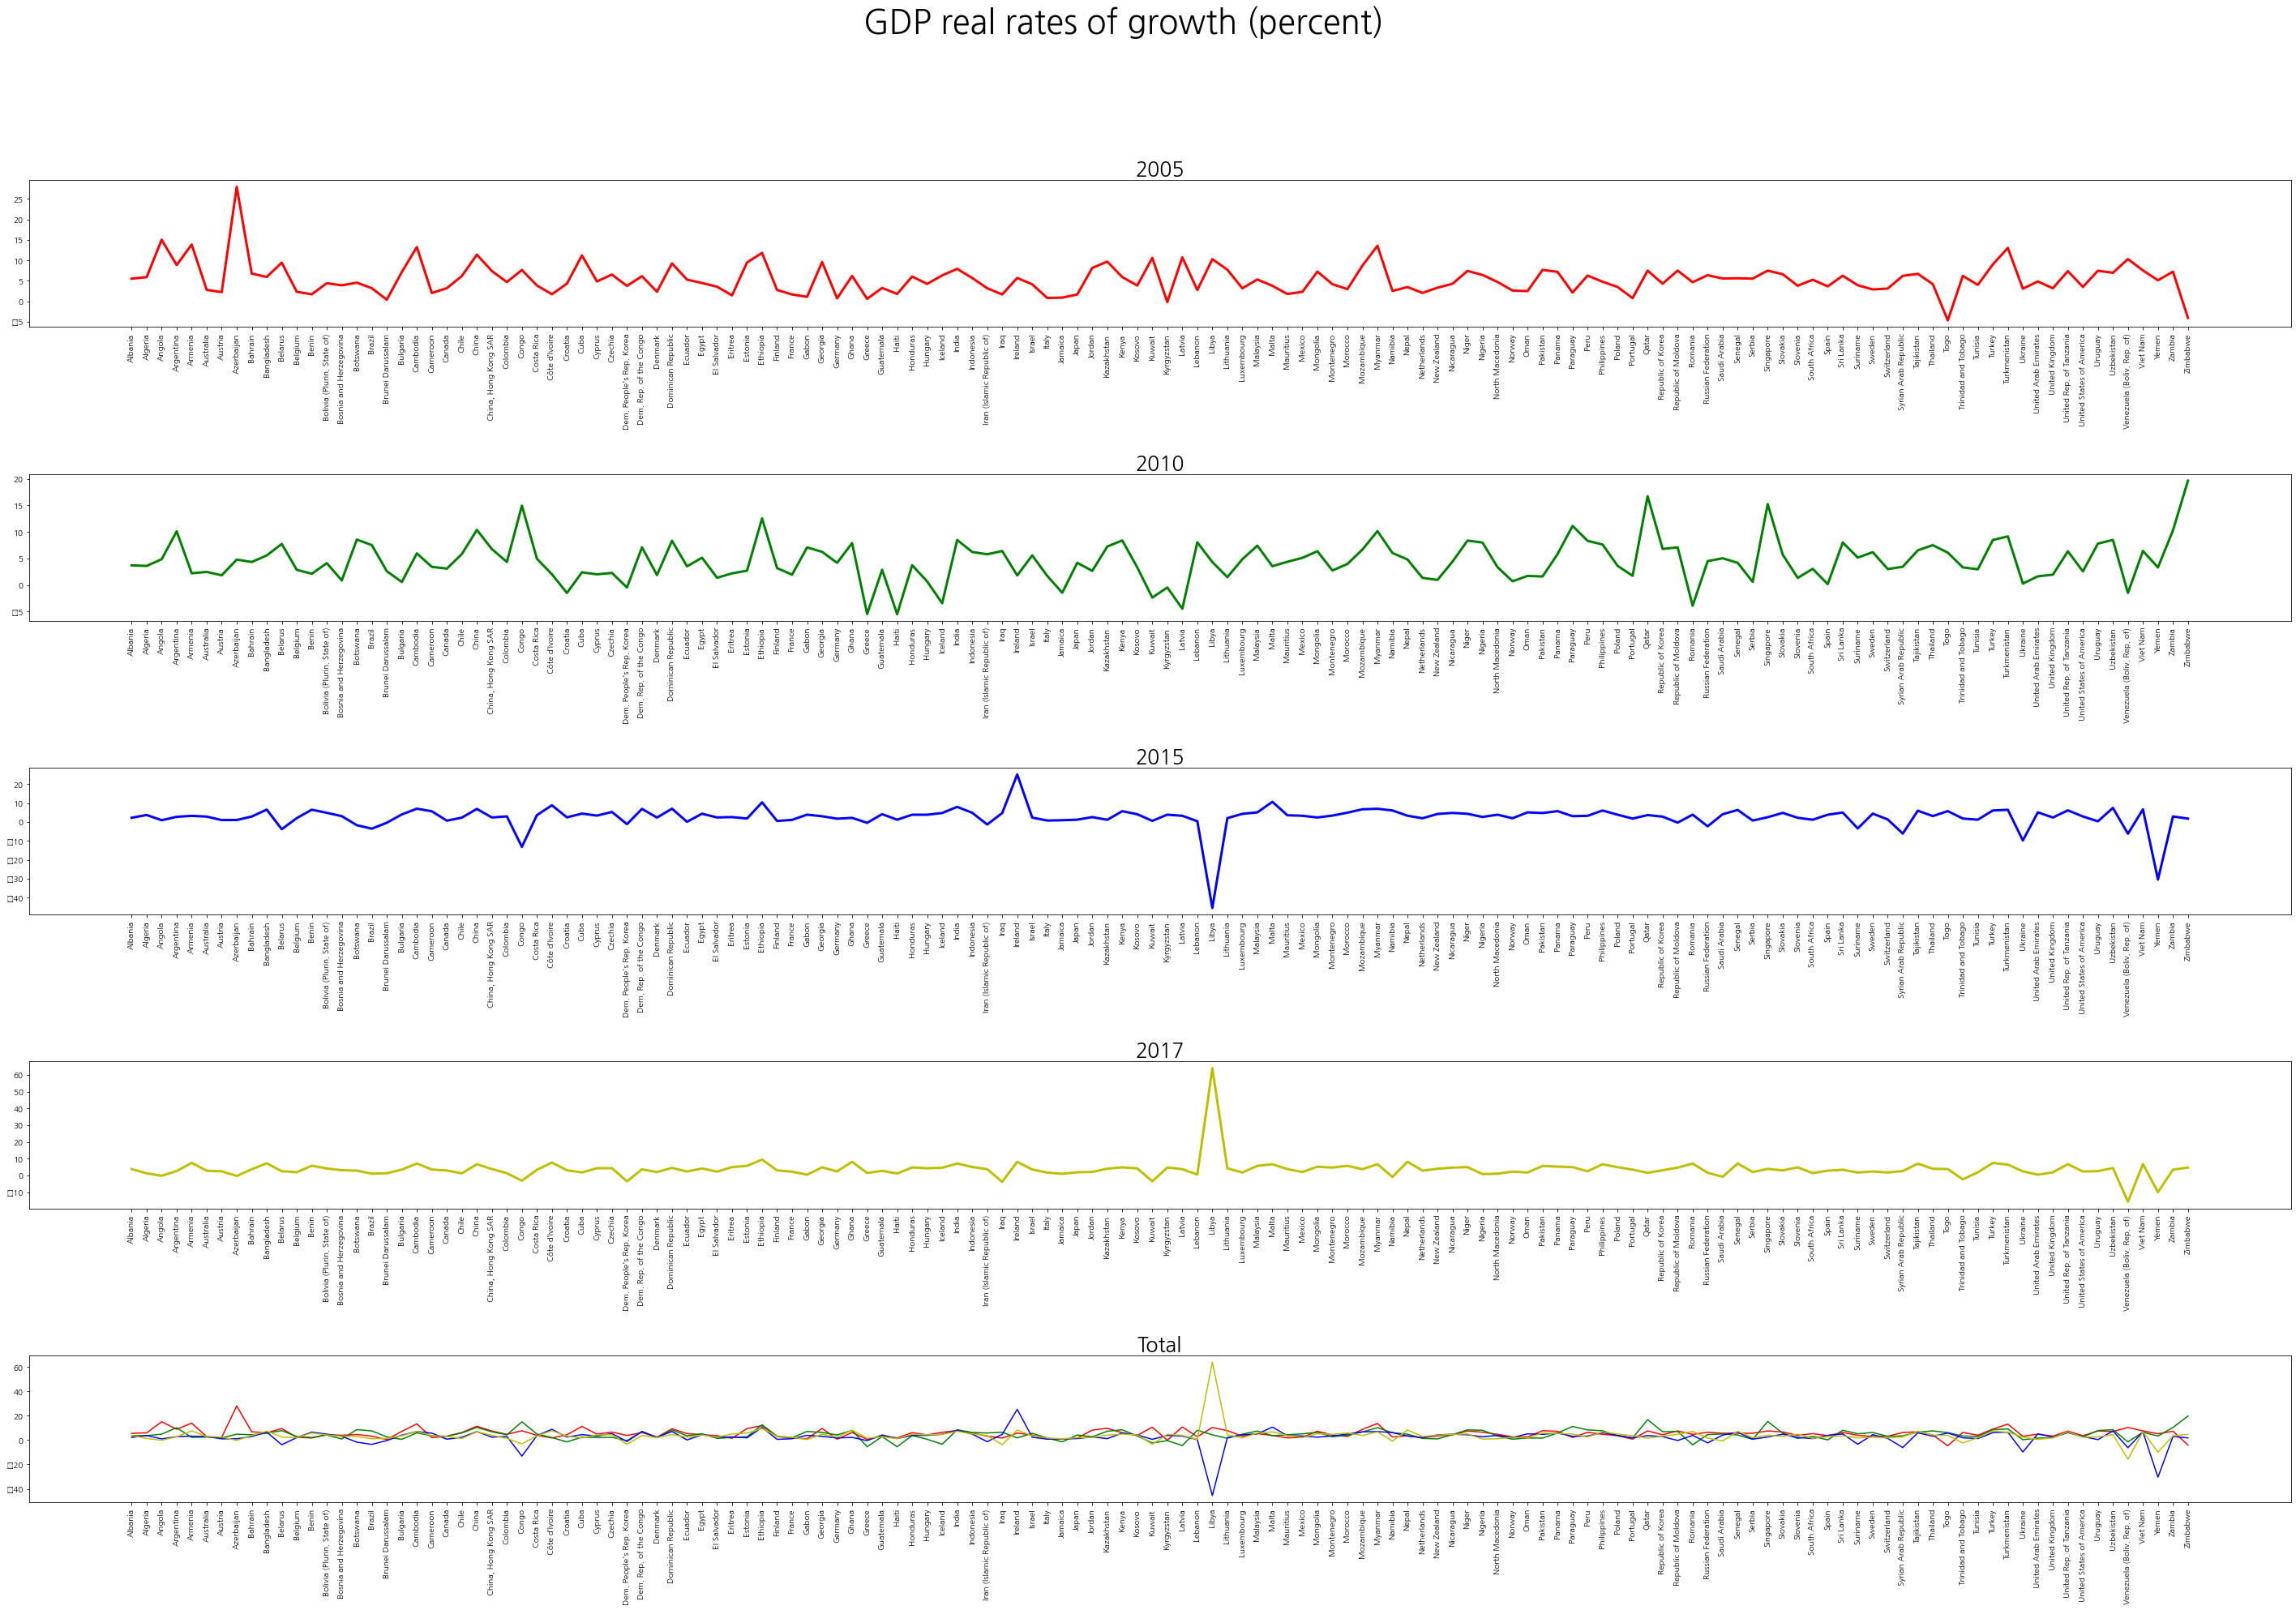

In [20]:
graph(a3,b3,c3,d3,gdp_key[3]) 

### Co2그래프

Emissions (thousand metric tons of carbon dioxide)
CO2 emission estimates 3825.1840


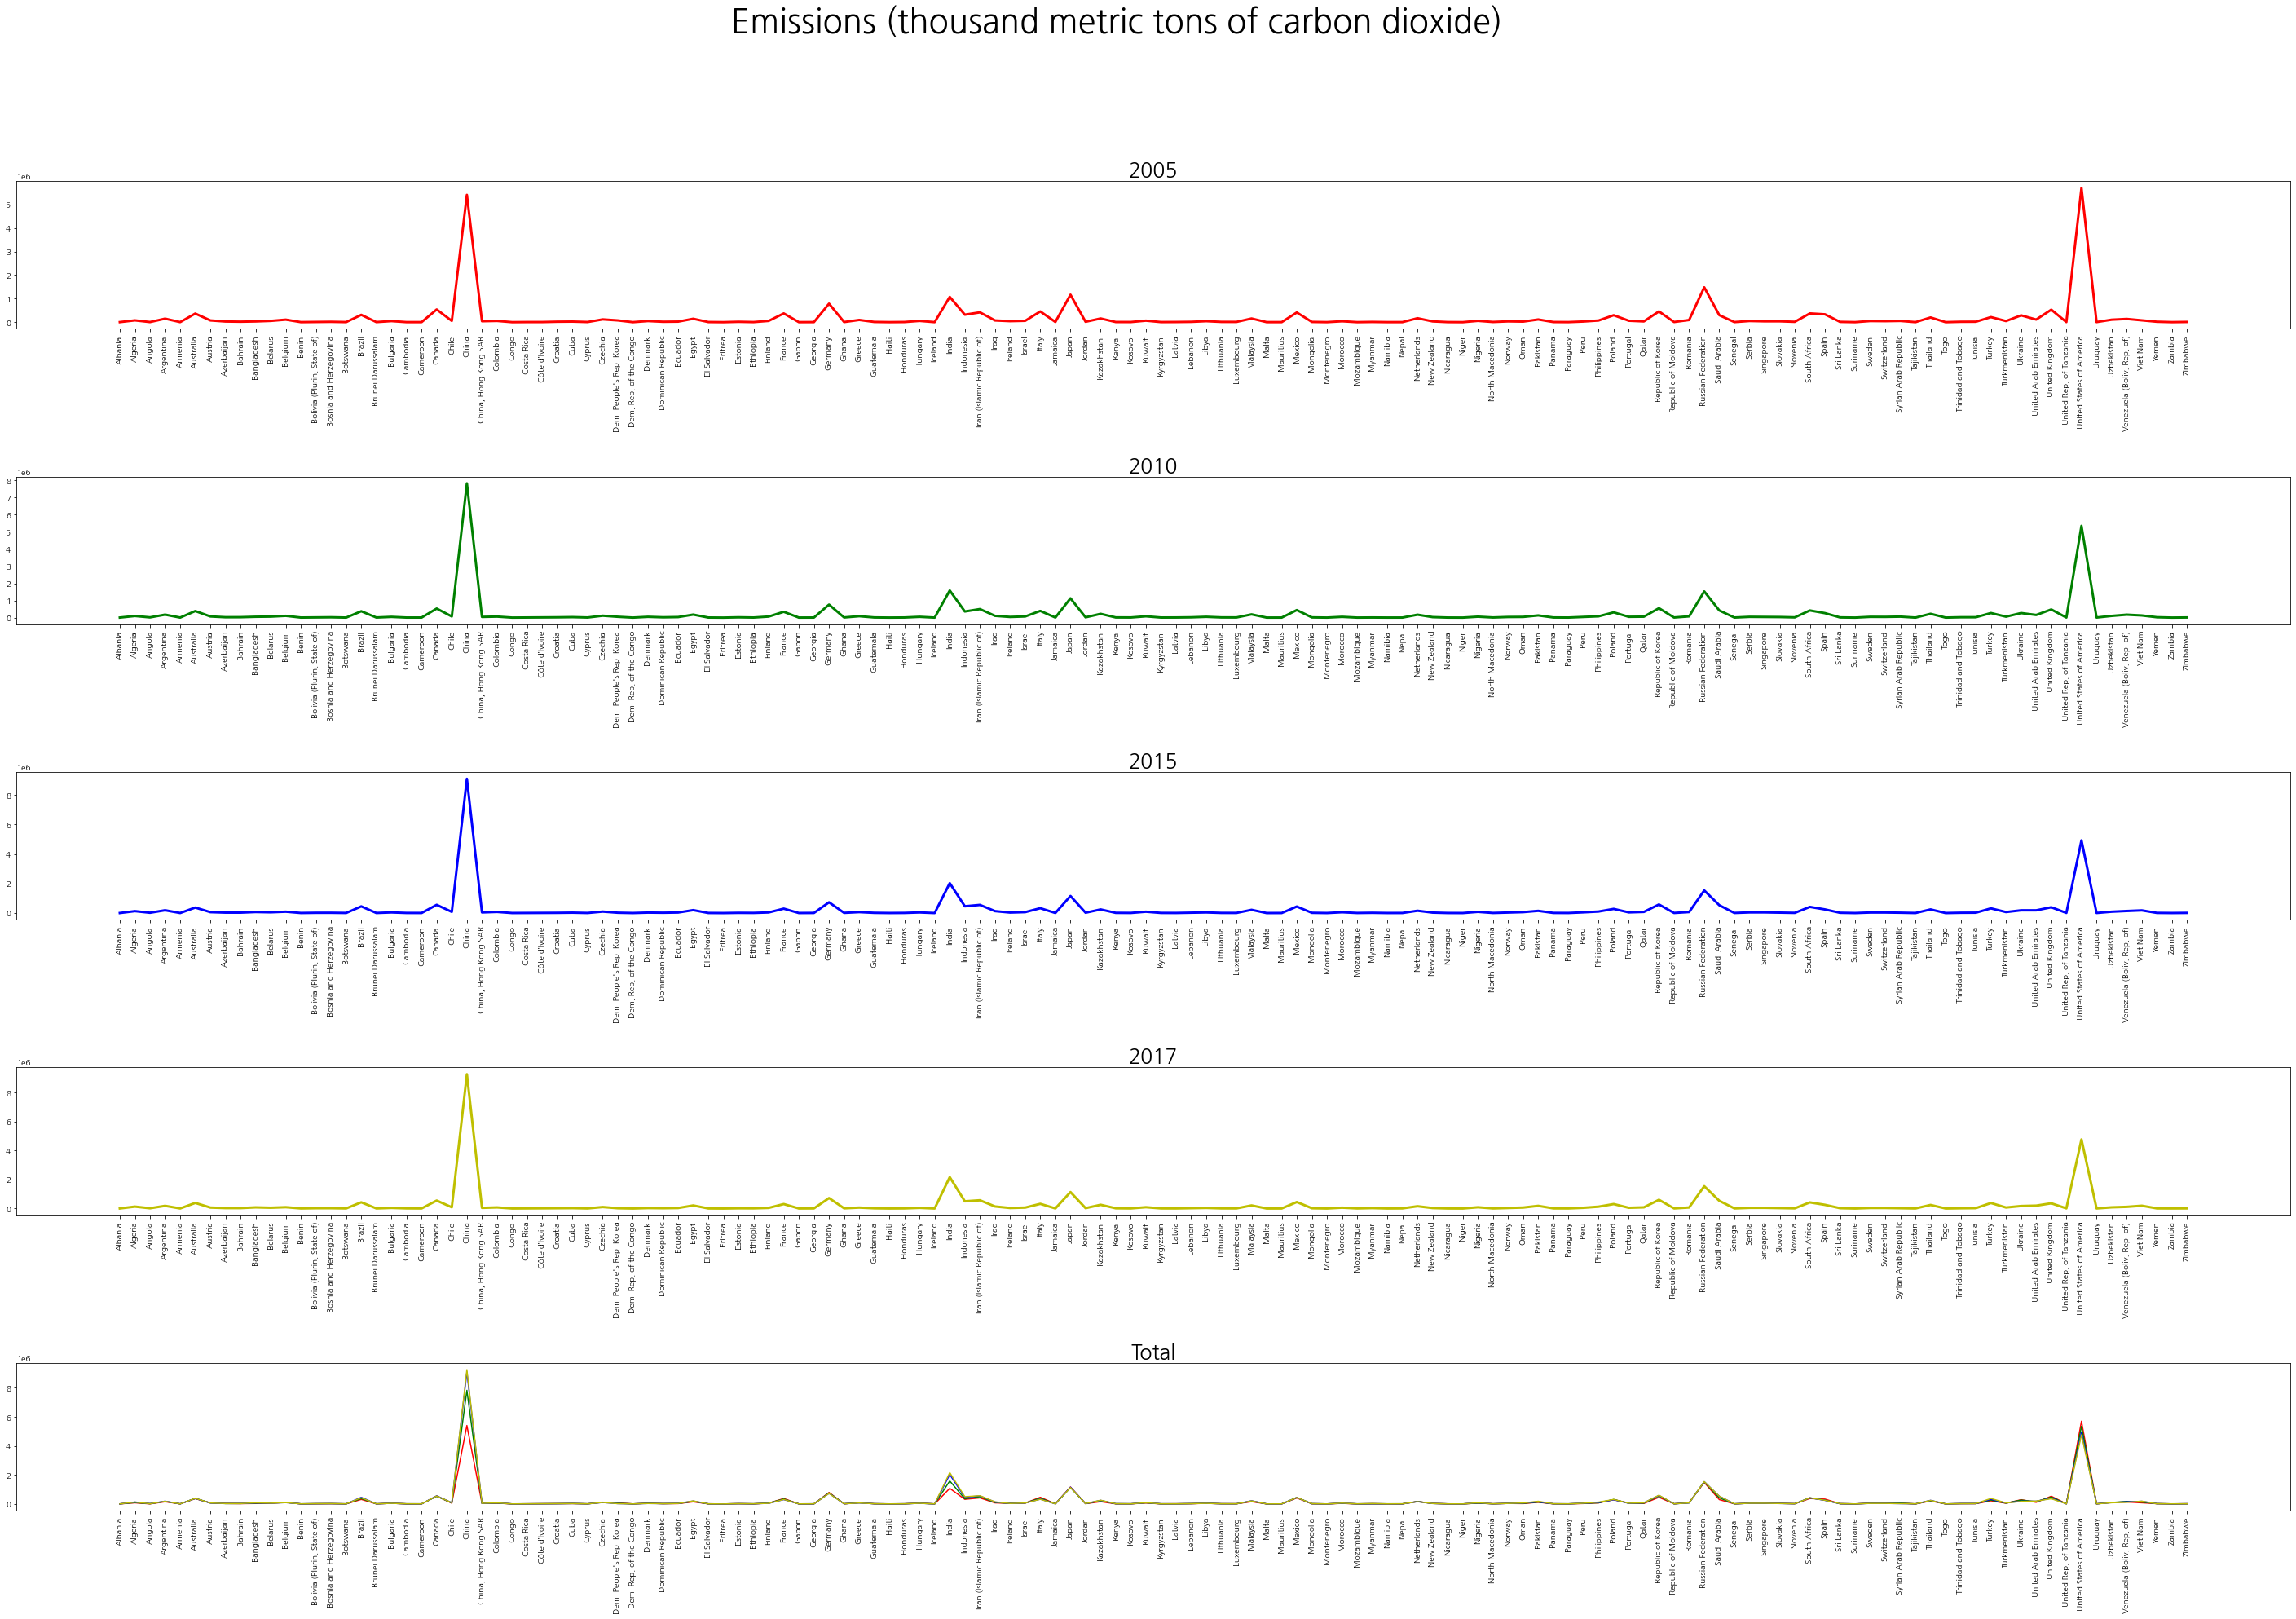

In [21]:
graph(a00,b00,c00,d00,co2_key[0]) 

Emissions per capita (metric tons of carbon dioxide)
CO2 emission estimates 1.2700


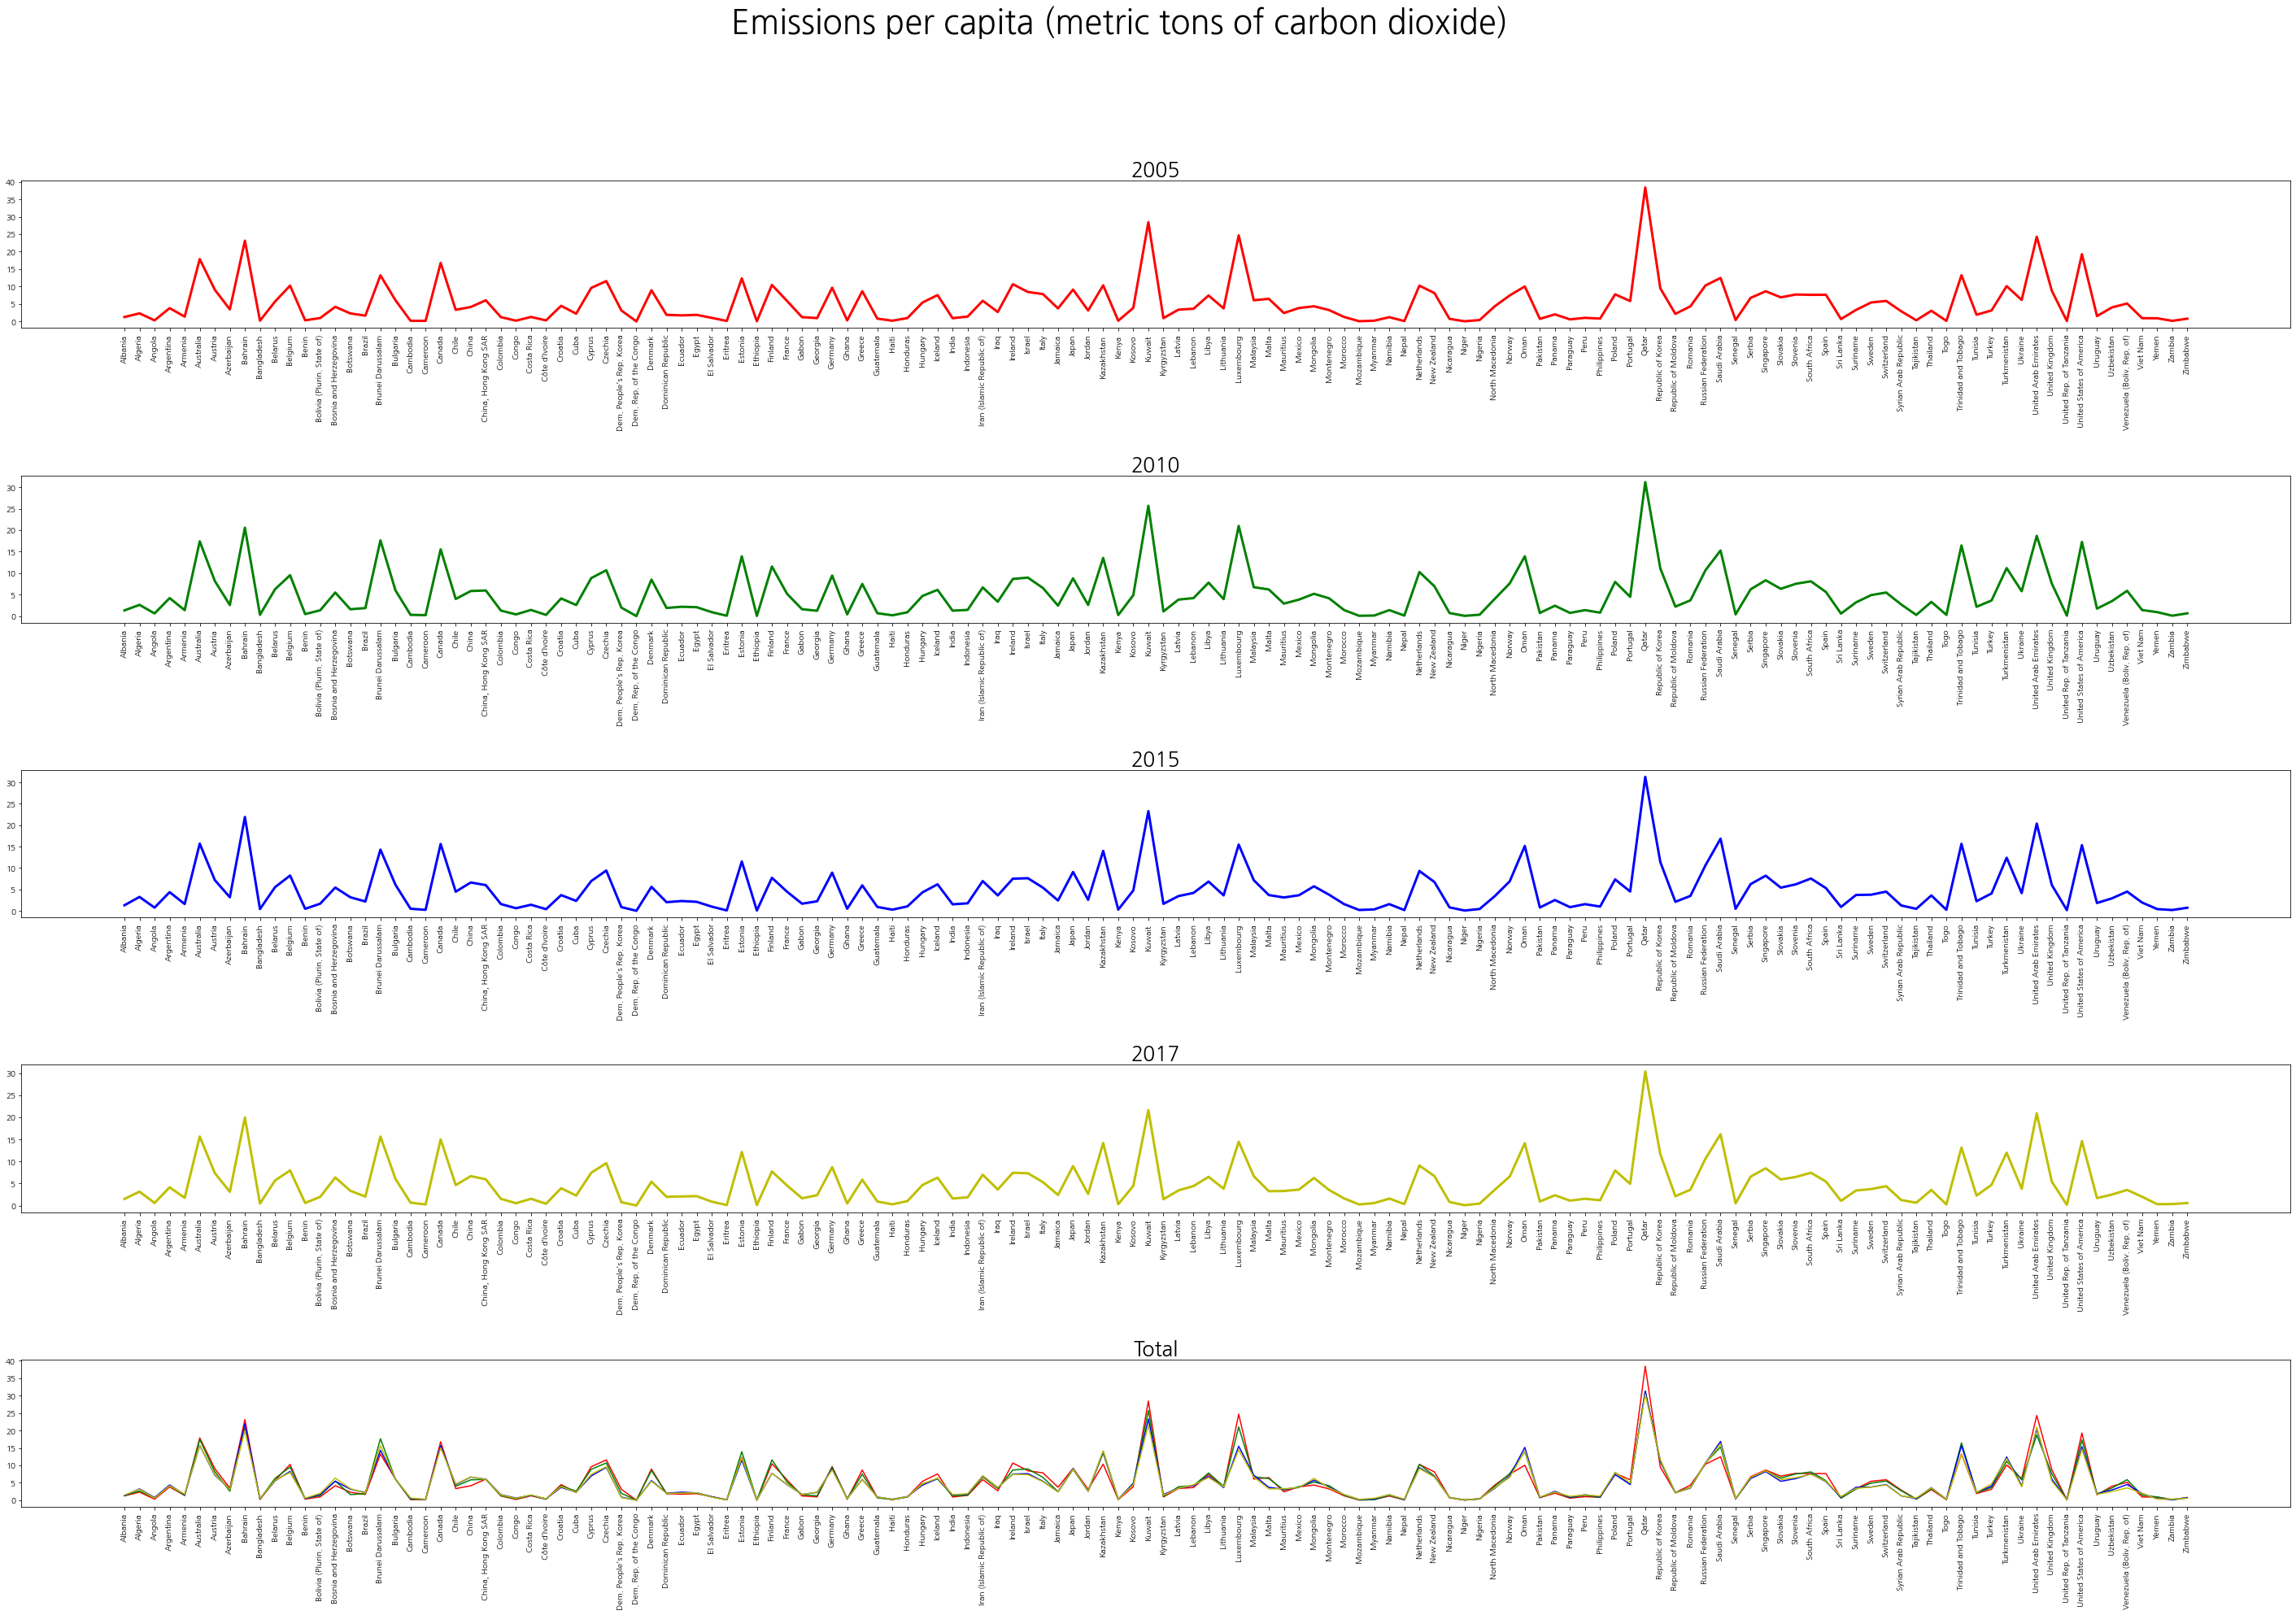

In [22]:
graph(a11,b11,c11,d11,co2_key[1]) 

------------------------------------------------

In [23]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [24]:
# for문을 통해 데이터프레임을 호출하고, 사이즈를 조정
# 그러나 데이터 프레임은 상호작용 불가, 해쉬 X 안됨 결론.
#for i in GDP:
#    i = size_(country,i)
#def size_(sizing, df):  
#    df_country = df.columns[1]
#    size_col = sizing.columns[0]
#    return pd.merge(sizing,df,left_on='%s'%size_col,right_on='%s'%df_country)#

In [25]:
def similarity(i,j):
    result = pd.merge(i,j,left_on='%s'%i.columns[1],right_on='%s'%j.columns[1])
    result = result.drop('CO2 emission estimates',axis=1)
    return cos_sim(result['Unnamed: 4_x'].astype('float'),result['Unnamed: 4_y'].astype('float'))

In [35]:
a00.head(1)

country T24 CO2 emission estimates Unnamed: 2  \
0  Albania   8                Albania       2005   

                                          Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0  Emissions (thousand metric tons of carbon diox...  3825.1840        NaN   

                                          Unnamed: 6  
0  International Energy Agency, IEA World Energy ...

In [88]:
sim_ = []
info_ = []
Gr = []
Graph = []
for i,v in enumerate(GDP):
    sim = []
    for j,k in enumerate(CO2):
        if i+j == 0:
            v=v.drop(['Unnamed: 5','Unnamed: 6'],axis=1)
            k=k.drop(['Unnamed: 5','Unnamed: 6'],axis=1)
            
        sim.append(similarity(v,k))
        sim_.append(similarity(v,k))
        info_.append([similarity(v,k),i,j])
        
        gdp_name = v['%s'%v.columns[3]].iloc[0]
        co2_name = k['%s'%v.columns[3]].iloc[0]
        gdp_year = v['%s'%v.columns[2]].iloc[0]
        co2_year = k['%s'%v.columns[2]].iloc[0]
        
        print( '%s --V.S-- %s'%(gdp_name,co2_name))
        print(gdp_year,co2_year)
        print(similarity(v,k),i,j)
        Gr.append(similarity(v,k))
        print()
    Graph.append(Gr)
    simil_mean = sum(sim)/len(sim)
    print('-'*130)
    print( '%s %s년 --V.S-- %s'%(gdp_name,gdp_year,co2_name))
    print('평균값==>>',simil_mean)
    print('-'*130,'\n')
    #print( '%s --V.S-- %s'%(gdp_name,co2_name))
    #print( '%s V.S %s\n'%(gdp_year,co2_year))
    
simil_mean = sum(sim_)/len(sim_)
print(simil_mean, 'co2와 internet usage 유사도 총합 평균')

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2005
0.8135279154936753 0 0

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2010
0.6876306921043156 0 1

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2015
0.6155252263409603 0 2

GDP in current prices (millions of US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2017
0.5994526821044945 0 3

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2005
0.3596056444050248 0 4

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2010
0.353448574791357 0 5

GDP in current prices (millions of US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2015
0.32518915634679707 0 6

GDP in current

0.20942886090016918 6 2

GDP per capita (US dollars) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2015 2017
0.20510704093440954 6 3

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2005
0.814366123254889 6 4

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2010
0.8004064554478548 6 5

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2015
0.7436085397959357 6 6

GDP per capita (US dollars) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2015 2017
0.7552870393509111 6 7

----------------------------------------------------------------------------------------------------------------------------------
GDP per capita (US dollars) 2015년 --V.S-- Emissions per capita (metric tons of carbon dioxide)
평균값==>> 0.5051350205233393
-------------------------------------------------------------------------------------------------------------


GDP real rates of growth (percent) --V.S-- Emissions (thousand metric tons of carbon dioxide)
2005 2017
0.24331288174368385 12 3

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2005
0.5195666625877 12 4

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2010
0.5442759476032244 12 5

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2015
0.5594932334846998 12 6

GDP real rates of growth (percent) --V.S-- Emissions per capita (metric tons of carbon dioxide)
2005 2017
0.5643095424617116 12 7

----------------------------------------------------------------------------------------------------------------------------------
GDP real rates of growth (percent) 2005년 --V.S-- Emissions per capita (metric tons of carbon dioxide)
평균값==>> 0.39187650476992164
---------------------------------------------------------------------------------------

In [27]:
print('최고 유사도->',max(sim_))
for i in range(len(sim_)): # 유사도가 제일 높은 데이터 조합 index찾기
    if max(sim_) == sim_[i]:
        print('최고 유사도 index',i)

sim_[88] == max(sim_)

최고 유사도-> 0.9693320097585361
최고 유사도 index 88


True

In [28]:
info_[88]

[0.9693320097585361, 11, 0]

In [29]:
first = info_[88][1]
second = info_[88][2]

In [30]:
GDP[first]

T12 Gross domestic product and gross domestic product per capita  \
20      1                      Total, all countries or areas             
48      2                                             Africa             
76     15                                    Northern Africa             
104   202                                 Sub-Saharan Africa             
132    14                                     Eastern Africa             
...   ...                                                ...             
6532  704                                           Viet Nam             
6557  887                                              Yemen             
6584  894                                             Zambia             
6609  836                                           Zanzibar             
6636  716                                           Zimbabwe             

     Unnamed: 2                                         Unnamed: 3  \
20         2017  GDP in constant 2010 prices (millions of US do...   
48         2017  GDP in constant 2010 prices (millions of US do...   
76         2017  GDP in constant 2010 prices (millions of US do...   
104        2017  GDP in constant 2010 prices (millions of US do...   
132        2017  GDP in constant 2010 prices (millions of US do...   
...         ...                                                ...   
6532       2017  GDP in constant 2010 prices (millions of US do...   
6557       2017  GDP in constant 2010 prices (millions of US do...   
6584       2017  GDP in constant 2010 prices (millions of US do...   
6609       2017  GDP in constant 2010 prices (millions of US do...   
6636       2017  GDP in constant 2010 prices (millions of US do...   

         Unnamed: 4 Unnamed: 5  \
20    79428815.9400        NaN   
48     2429753.5910        NaN   
76      791872.9152        NaN   
104    1637880.6750        NaN   
132     357337.8098        NaN   
...             ...        ...   
6532    219224.6055        NaN   
6557     20498.4134        NaN   
6584     22405.2451        NaN   
6609      1348.8315        NaN   
6636     21060.1861        NaN   

                                             Unnamed: 6  
20    United Nations Statistics Division, New York, ...  
48    United Nations Statistics Division, New York, ...  
76    United Nations Statistics Division, New York, ...  
104   United Nations Statistics Division, New York, ...  
132   United Nations Statistics Division, New York, ...  
...                                                 ...  
6532  United Nations Statistics Division, New York, ...  
6557  United Nations Statistics Division, New York, ...  
6584  United Nations Statistics Division, New York, ...  
6609  United Nations Statistics Division, New York, ...  
6636  United Nations Statistics Division, New York, ...  

[242 rows x 7 columns]

In [31]:
CO2[second]

T24      CO2 emission estimates Unnamed: 2  \
4       8                     Albania       2005   
20     12                     Algeria       2005   
36     24                      Angola       2005   
52     32                   Argentina       2005   
66     51                     Armenia       2005   
...   ...                         ...        ...   
2056  862  Venezuela (Boliv. Rep. of)       2005   
2072  704                    Viet Nam       2005   
2088  887                       Yemen       2005   
2104  894                      Zambia       2005   
2120  716                    Zimbabwe       2005   

                                             Unnamed: 3   Unnamed: 4  \
4     Emissions (thousand metric tons of carbon diox...    3825.1840   
20    Emissions (thousand metric tons of carbon diox...   77474.1300   
36    Emissions (thousand metric tons of carbon diox...    6146.6910   
52    Emissions (thousand metric tons of carbon diox...  149476.0400   
66    Emissions (thousand metric tons of carbon diox...    4129.8450   
...                                                 ...          ...   
2056  Emissions (thousand metric tons of carbon diox...  137701.5480   
2072  Emissions (thousand metric tons of carbon diox...   79230.1850   
2088  Emissions (thousand metric tons of carbon diox...   18836.2220   
2104  Emissions (thousand metric tons of carbon diox...    2120.6920   
2120  Emissions (thousand metric tons of carbon diox...   10272.7740   

     Unnamed: 5                                         Unnamed: 6  
4           NaN  International Energy Agency, IEA World Energy ...  
20          NaN  International Energy Agency, IEA World Energy ...  
36          NaN  International Energy Agency, IEA World Energy ...  
52          NaN  International Energy Agency, IEA World Energy ...  
66          NaN  International Energy Agency, IEA World Energy ...  
...         ...                                                ...  
2056        NaN  International Energy Agency, IEA World Energy ...  
2072        NaN  International Energy Agency, IEA World Energy ...  
2088        NaN  International Energy Agency, IEA World Energy ...  
2104        NaN  International Energy Agency, IEA World Energy ...  
2120        NaN  International Energy Agency, IEA World Energy ...  

[140 rows x 7 columns]